<h2>Survival prediction of patients with heart failure using ML techniques</h2>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.pyplot import figure
from math import *
import statistics
from scipy.stats import shapiro
from numpy.random import randn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

data = np.genfromtxt('heart_failure_clinical_records_dataset.csv', delimiter = ',')
X = np.delete(data, 0, axis = 0)
y = np.delete(X, np.arange(0, 12), axis = 1)
X = np.delete(X, 12, axis = 1)

# Standardization
object = StandardScaler()
X_standardized = object.fit_transform(X)

Y = []
for i in range(0, len(y)):
    Y.append(y[i][0])

def column(matrix, p):
    return np.array([row[p] for row in matrix])

In [2]:
# Are these two classes unbalanced - YES
death_count = 0
alive_count = 0

for i in range(0, len(Y)):
    if(Y[i] == 0):
        alive_count = alive_count + 1
    else:
        death_count = death_count + 1
        
death_percent = death_count / len(Y) * 100
alive_percent = 100 - death_percent

print("Percentage of alive patients:", alive_percent, "%")
print("Percentage of dead patients:", death_percent, "%")

Percentage of alive patients: 67.89297658862876 %
Percentage of dead patients: 32.10702341137124 %


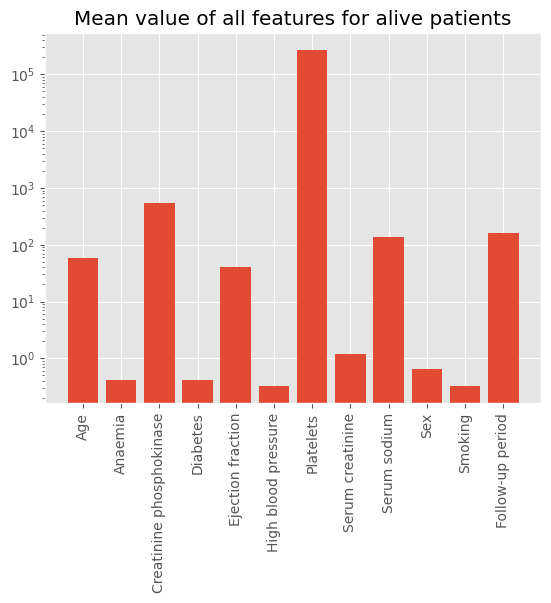

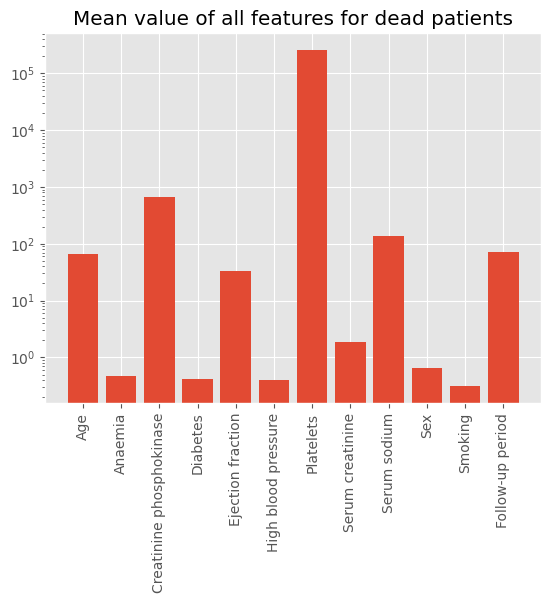

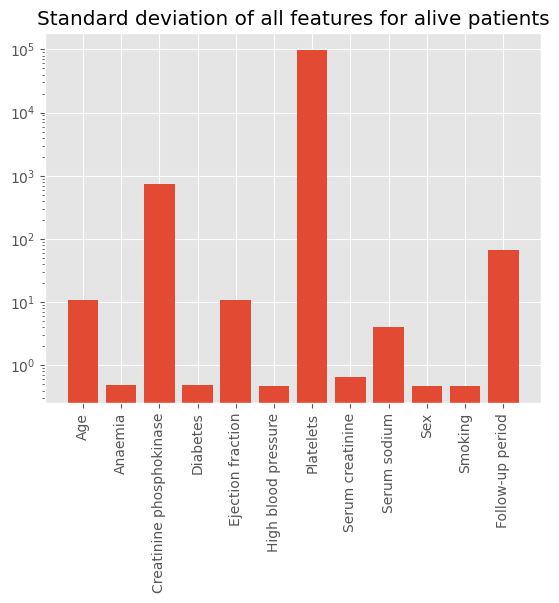

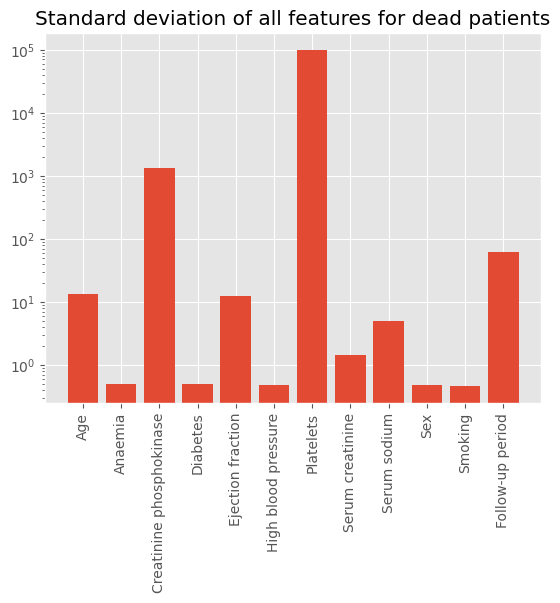

Mean value of all features for alive patients: [58.761906403940884, 0.4088669950738916, 540.0541871921182, 0.4187192118226601, 40.26600985221675, 0.3251231527093596, 266657.4899014778, 1.1848768472906404, 137.2167487684729, 0.6502463054187192, 0.3251231527093596, 158.3399014778325]
Mean value of all features for dead patients: [65.21528125, 0.4791666666666667, 670.1979166666666, 0.4166666666666667, 33.46875, 0.40625, 256381.04479166667, 1.8358333333333334, 135.375, 0.6458333333333334, 0.3125, 70.88541666666667]
Standard deviation of all features for alive patients: [10.63789022651552, 0.4928400188725666, 753.799571556601, 0.4945688541151392, 10.859962681586296, 0.46957887137465665, 97531.20228346101, 0.654082654120788, 3.982923359302211, 0.47807103994211153, 0.46957887137465665, 67.7428724392971]
Standard deviation of all features for dead patients: [13.214555639583374, 0.502188194262012, 1316.5806399417006, 0.49559462778335206, 12.52530333701386, 0.49371044145328746, 98525.68285648679

In [3]:
# barplots of mean values and std devs of positives and negatives for each feature
stdev_alive = []
stdev_death = []
mean_alive = []
mean_death = []
hist_alive = []
hist_death = []

for i in range(0, 12):
    sample_alive = []
    sample_death = []
    for j in range(0, len(Y)):
        if(Y[j] == 0):     # for alive
            sample_alive.append(column(X, i)[j])
        else:              # for dead
            sample_death.append(column(X, i)[j])
            
    stdev_alive.append(statistics.stdev(sample_alive))
    stdev_death.append(statistics.stdev(sample_death))
    mean_alive.append(statistics.mean(sample_alive))
    mean_death.append(statistics.mean(sample_death))
    
    hist_alive.append(sample_alive)
    hist_death.append(sample_death)

bars = ['Age', 'Anaemia', 'Creatinine phosphokinase', 'Diabetes', 'Ejection fraction',
        'High blood pressure', 'Platelets', 'Serum creatinine', 'Serum sodium', 'Sex', 'Smoking', 'Follow-up period']
y_pos = np.arange(len(bars))

plt.style.use('ggplot')

plt.yscale('log')
plt.bar(y_pos, mean_alive)
plt.xticks(y_pos, bars, rotation='vertical')
plt.title("Mean value of all features for alive patients")
plt.show()

plt.yscale('log')
plt.bar(y_pos, mean_death)
plt.xticks(y_pos, bars, rotation='vertical')
plt.title("Mean value of all features for dead patients")
plt.show()

plt.yscale('log')
plt.bar(y_pos, stdev_alive)
plt.xticks(y_pos, bars, rotation='vertical')
plt.title("Standard deviation of all features for alive patients")
plt.show()

plt.yscale('log')
plt.bar(y_pos, stdev_death)
plt.xticks(y_pos, bars, rotation='vertical')
plt.title("Standard deviation of all features for dead patients")
plt.show()

print("Mean value of all features for alive patients:", mean_alive)
print("Mean value of all features for dead patients:", mean_death)

print("Standard deviation of all features for alive patients:", stdev_alive)
print("Standard deviation of all features for dead patients:", stdev_death)

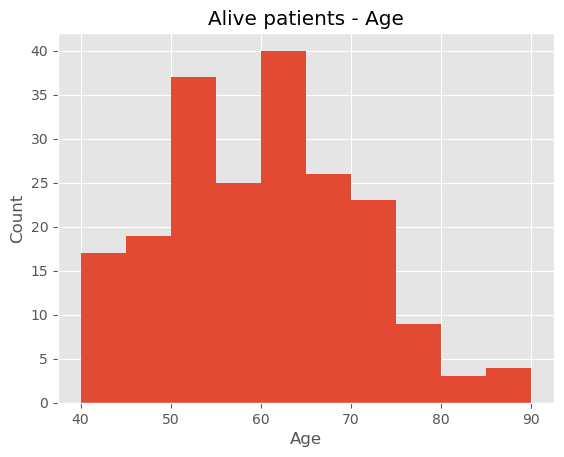

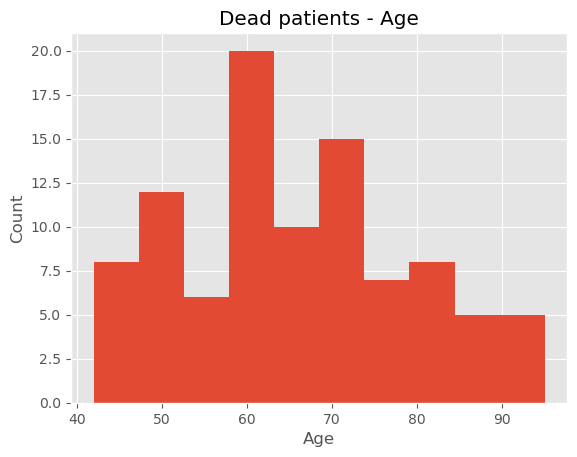

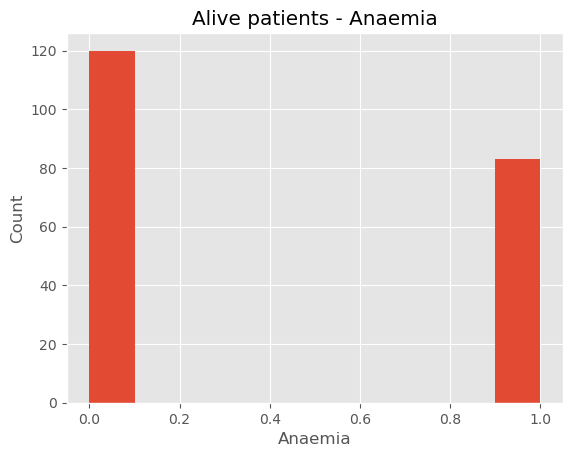

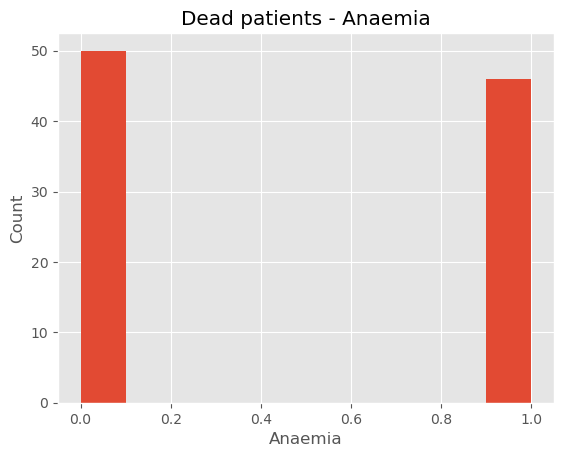

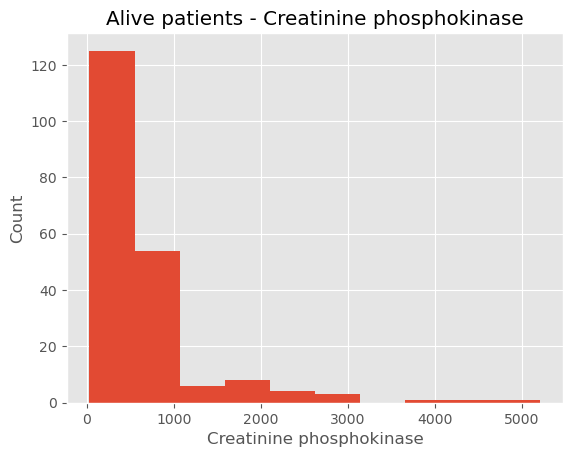

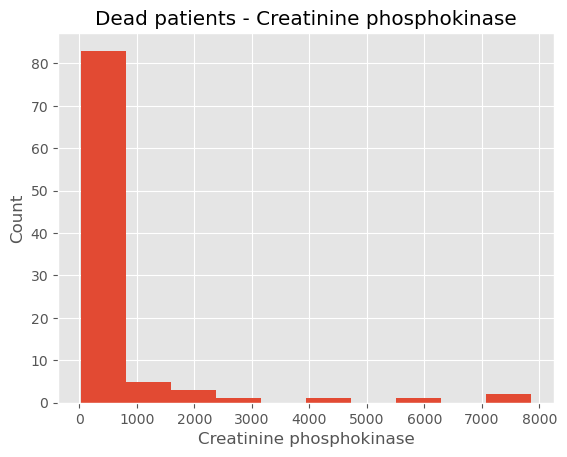

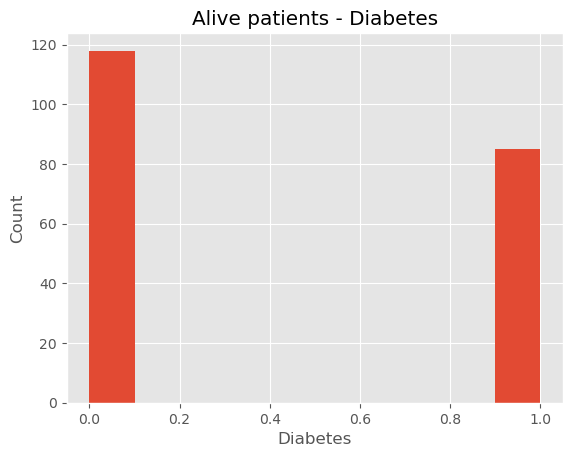

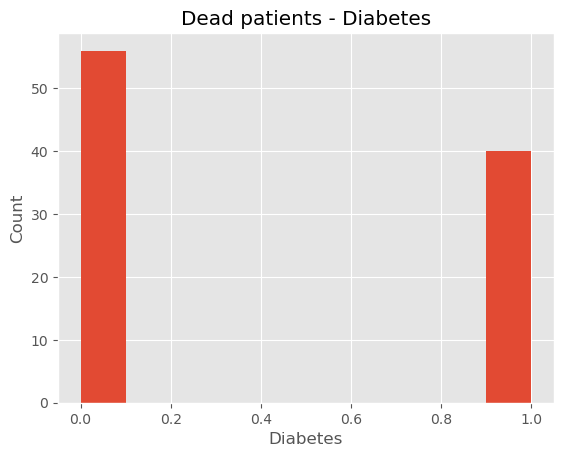

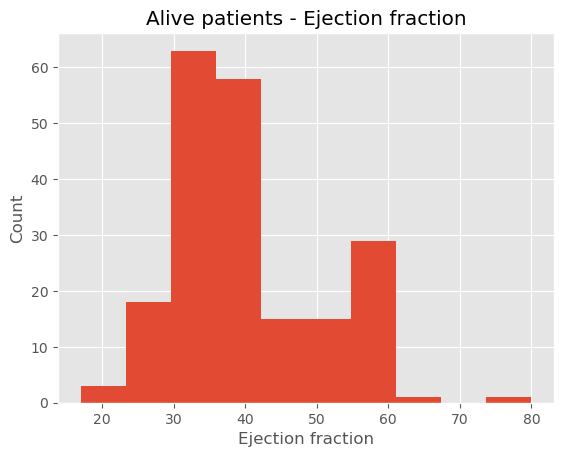

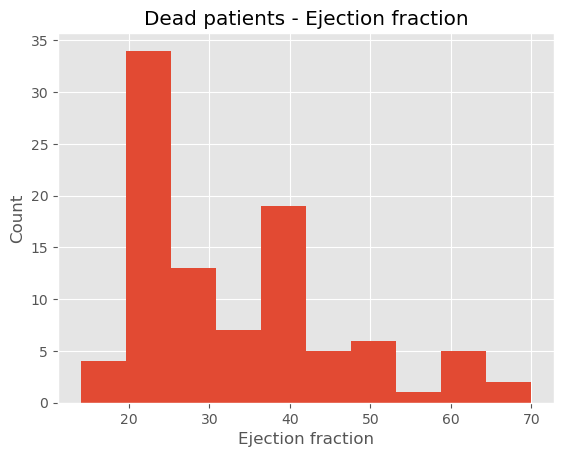

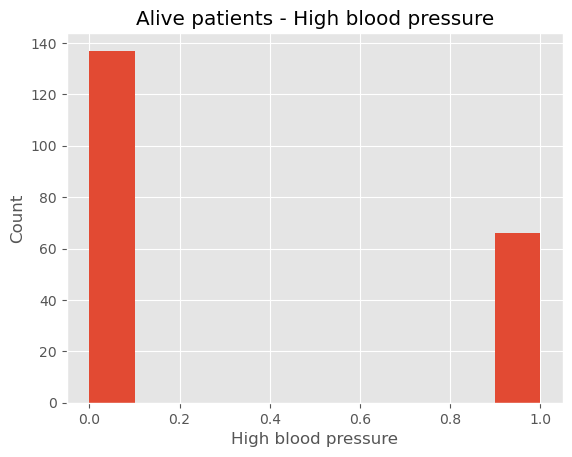

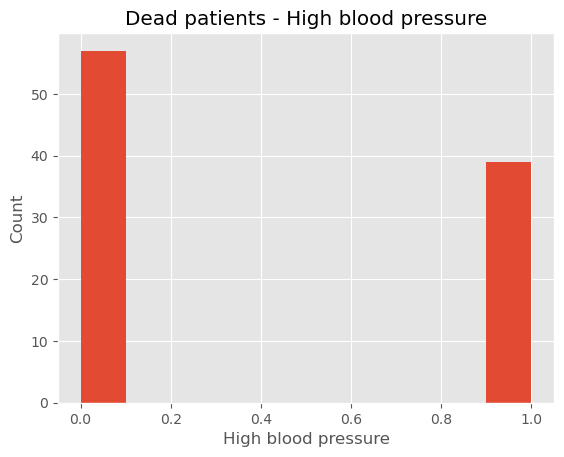

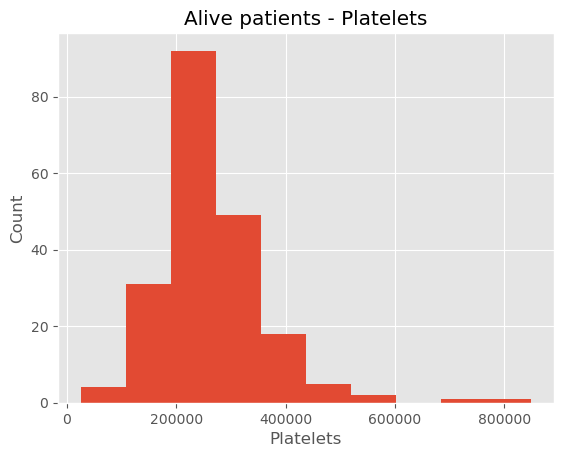

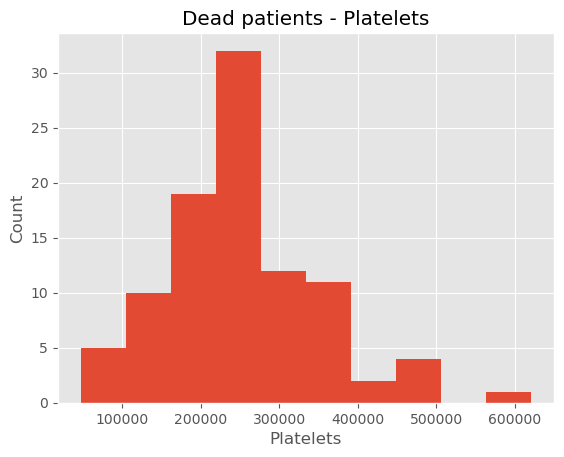

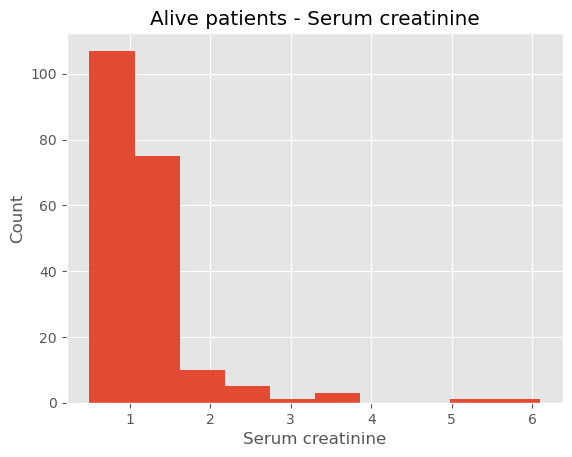

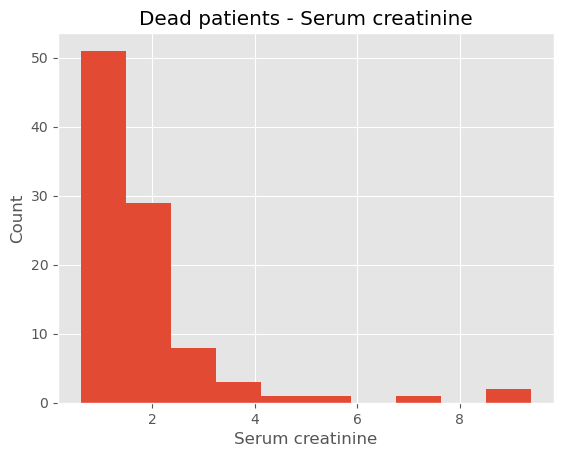

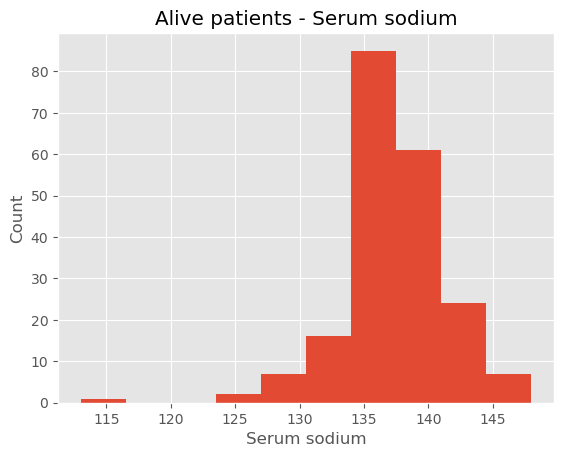

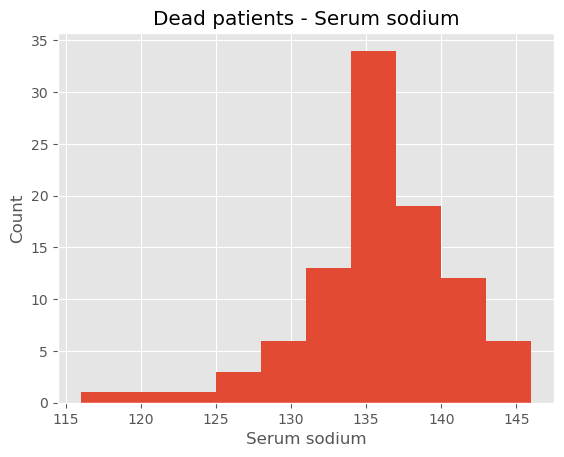

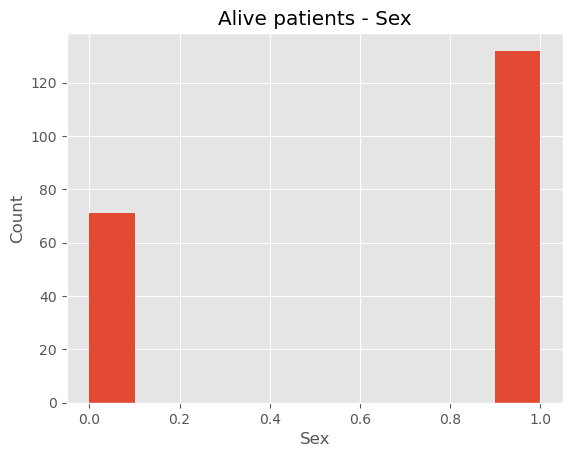

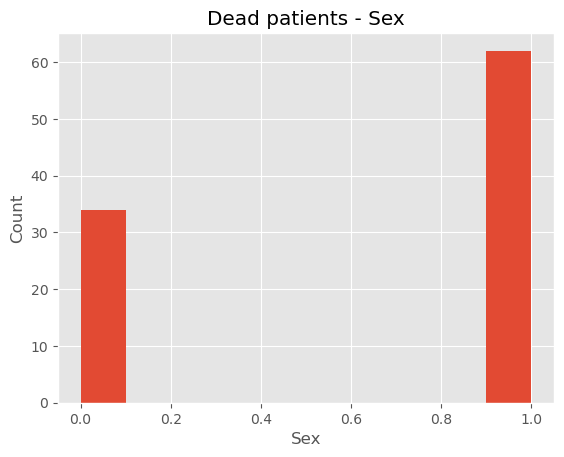

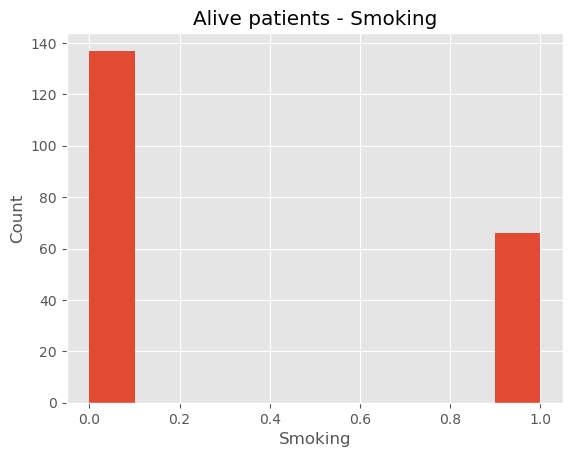

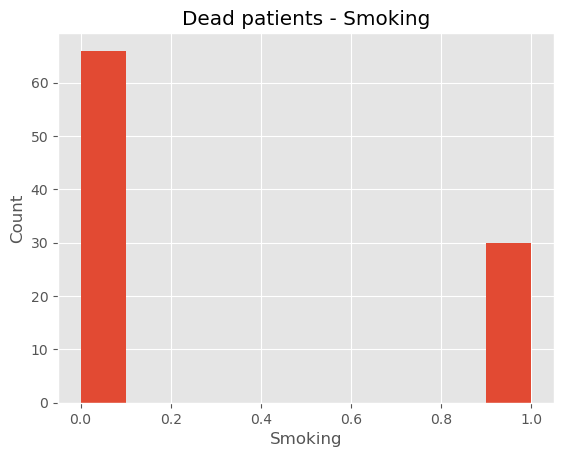

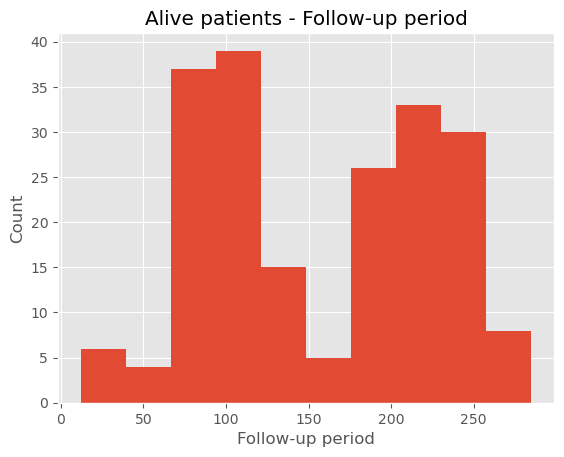

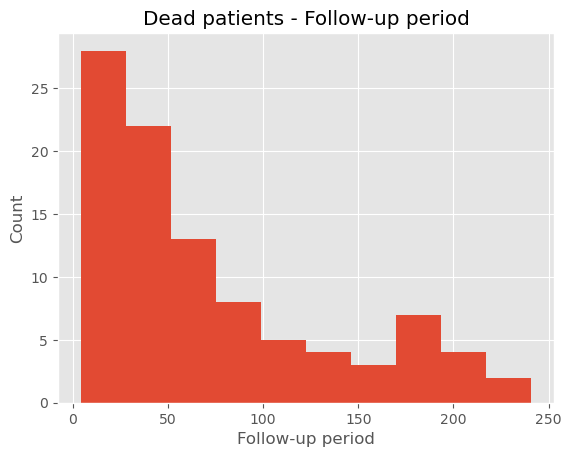

In [4]:
# hists of positives and negatives examples for each feature
for i in range(0, 12):
    plt.hist(hist_alive[i], 10)
    plt.title("Alive patients - " + bars[i])
    plt.xlabel(bars[i])
    plt.ylabel("Count")
    plt.show()
    
    plt.hist(hist_death[i], 10)
    plt.title("Dead patients - " + bars[i])
    plt.xlabel(bars[i])
    plt.ylabel("Count")
    plt.show()

In [5]:
# Pearson correlation coefficients (PCC)
coef_cor_pearson = []
print("abs(PCC):")

for i in range(0, 11):
    coef_cor_pearson.append(abs(np.corrcoef(column(X_standardized, i), Y)[0][1]))
    print(bars[i], "-", '%.3f'%(coef_cor_pearson[i]))

abs(PCC):
Age - 0.254
Anaemia - 0.066
Creatinine phosphokinase - 0.063
Diabetes - 0.002
Ejection fraction - 0.269
High blood pressure - 0.079
Platelets - 0.049
Serum creatinine - 0.294
Serum sodium - 0.195
Sex - 0.004
Smoking - 0.013


In [6]:
# Shapiro–Wilk test
coef_cor_shapiro = []
print("p-value:")

for i in range(0, 11):
    coef_cor_shapiro.append(shapiro(column(X_standardized, i))[1])
    print(bars[i], "-", coef_cor_shapiro[i])

coef_cor_shapiro.append(shapiro(Y)[1])
print("Death event -", coef_cor_shapiro[11])

p-value:
Age - 5.3476593166124076e-05
Anaemia - 6.2099638288205785e-25
Creatinine phosphokinase - 7.05055700731454e-28
Diabetes - 5.115523846896366e-25
Ejection fraction - 7.215172015406779e-09
High blood pressure - 1.1686175589182754e-25
Platelets - 2.8836867789483467e-12
Serum creatinine - 5.3927583038658e-27
Serum sodium - 9.220169072676754e-10
Sex - 1.1685004623776566e-25
Smoking - 4.5818434207772147e-26
Death event - 4.5818434207772147e-26


<AxesSubplot:>

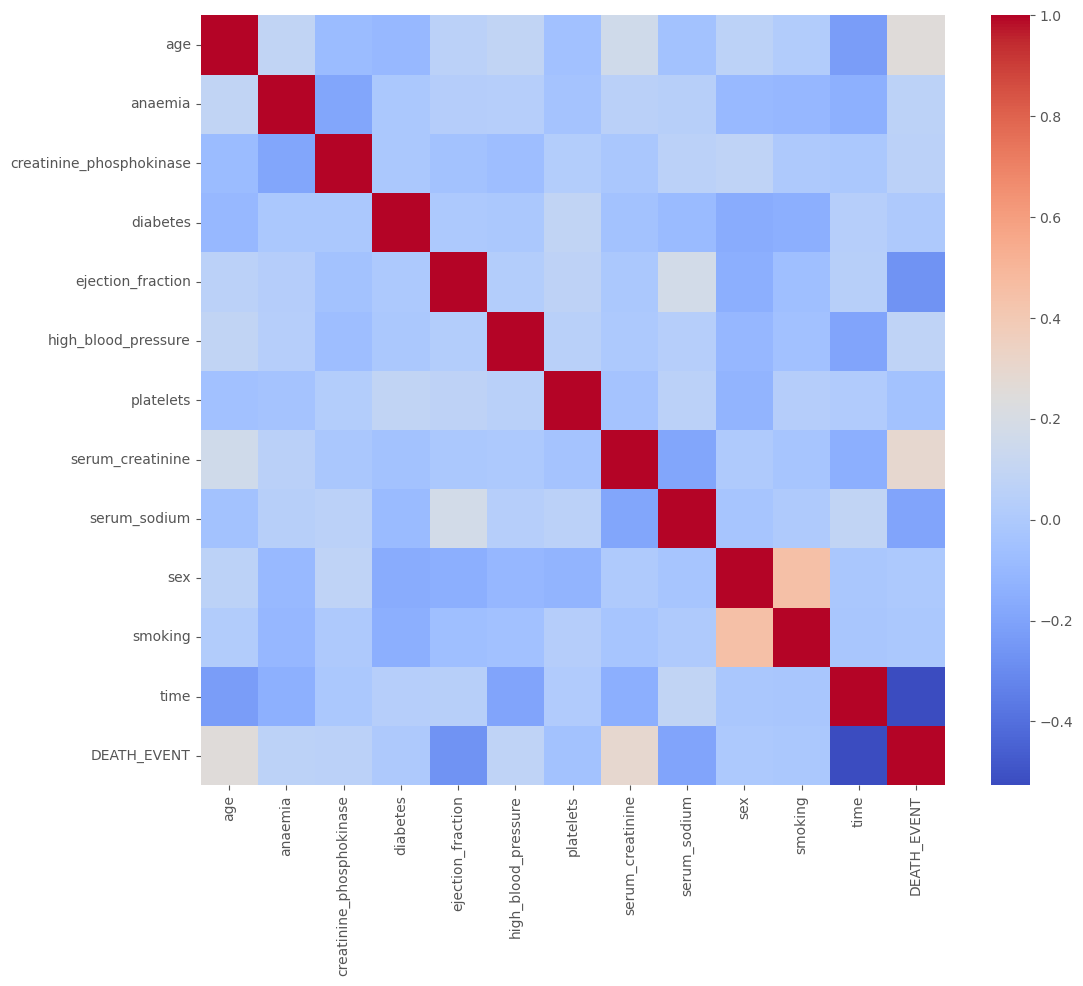

In [7]:
# Correlation between every two features
pd_data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
correlations = pd_data.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlations, cmap = "coolwarm", annot = False)

<h3>Basic statistical models that are not expected to predict as efficient as ML models</h3>

In [8]:
# model based only on ejection fraction and sex -> for adult men 52% to 72% normal, for adult women 54% to 74% normal
# women -> 0, men -> 1 => women -> -1.3592715135759472, men -> 0.7356881903374971 after standardization
ej_frac = column(X_standardized, 4)
sex = column(X_standardized, 9)

prediction_ej_frac = []
for i in range(0, len(Y)):
    # women
    if(sex[i] == -1.3592715135759472 and ej_frac[i] >= 54 and ej_frac[i] <= 74):
        prediction_ej_frac.append(0)
    if(sex[i] == -1.3592715135759472 and (ej_frac[i] < 54 or ej_frac[i] > 74)):
        prediction_ej_frac.append(1)
    
    # men
    if(sex[i] == 0.7356881903374971 and ej_frac[i] >= 52 and ej_frac[i] <= 72):
        prediction_ej_frac.append(0)
    if(sex[i] == 0.7356881903374971 and (ej_frac[i] < 52 or ej_frac[i] > 72)):
        prediction_ej_frac.append(1)

errors_ej_frac = 0
for j in range(0, len(Y)):
    if(Y[j] != prediction_ej_frac[j]):
        errors_ej_frac = errors_ej_frac + 1

score_ej_frac = (1 - errors_ej_frac / len(Y)) * 100

# model based only on serum creatinine and sex -> for adult men 0.74 to 1.35 mg/dL normal, for adult women 0.59 to 1.04 mg/dL normal
# women -> 0, men -> 1 => women -> -1.3592715135759472, men -> 0.7356881903374971 after standardization
serum_crea = column(X_standardized, 7)

prediction_serum_crea = []
for i in range(0, len(Y)):
    # women
    if(sex[i] == -1.3592715135759472 and serum_crea[i] >= 0.59 and serum_crea[i] <= 1.04):
        prediction_serum_crea.append(0)
    if(sex[i] == -1.3592715135759472 and (serum_crea[i] < 0.59 or serum_crea[i] > 1.04)):
        prediction_serum_crea.append(1)
        
    # men
    if(sex[i] == 0.7356881903374971 and serum_crea[i] >= 0.74 and serum_crea[i] <= 1.35):
        prediction_serum_crea.append(0)
    if(sex[i] == 0.7356881903374971 and (serum_crea[i] < 0.74 or serum_crea[i] > 1.35)):
        prediction_serum_crea.append(1)

errors_serum_crea = 0
for j in range(0, len(Y)):
    if(Y[j] != prediction_serum_crea[j]):
        errors_serum_crea = errors_serum_crea + 1

score_serum_crea = (1 - errors_serum_crea / len(Y)) * 100

print("Accuracy of death prediction based only on serum creatinine parameter is", score_serum_crea, "%")
print("Accuracy of death prediction based only on ejection fraction parameter is", score_ej_frac, "%")

Accuracy of death prediction based only on serum creatinine parameter is 31.77257525083612 %
Accuracy of death prediction based only on ejection fraction parameter is 32.10702341137124 %


In [9]:
# model based only on class size
X_train_class_size, X_test_class_size, y_train_class_size, y_test_class_size = train_test_split(X_standardized, Y, test_size = 0.3) # 70% training and 30% test

alive_count_train = 0
death_count_train = 0

for i in range(0, len(X_train_class_size)):
    if(y_train_class_size[i] == 0):
        alive_count_train = alive_count_train + 1
    else:
        death_count_train = death_count_train + 1
        
death_percent_class_size = death_count_train / len(X_train_class_size) * 100
alive_percent_class_size = 100 - death_percent_class_size

len_train_class_size = len(X_train_class_size)
y_prediction_class_size = []

for i in range(0, len(X_test_class_size)):
    if(alive_percent_class_size >= death_percent_class_size):
        y_prediction_class_size.append(0)
        
        alive_count_train = alive_count_train + 1
        len_train_class_size = len_train_class_size + 1
        alive_percent_class_size = alive_count_train / len_train_class_size * 100
        death_percent_class_size = 100 - alive_percent_class_size
    else:
        y_prediction_class_size.append(1)
        
        death_count_train = death_count_train + 1
        len_train_class_size = len_train_class_size + 1
        death_percent_class_size = death_percent_class_size / len_train_class_size * 100
        alive_percent_class_size = 100 - death_percent_class_size

errors_class_size = 0
for i in range(0, len(y_test_class_size)):
    if(y_test_class_size[i] != y_prediction_class_size[i]):
        errors_class_size = errors_class_size + 1
        
score_class_size = (1 - errors_class_size / len(y_test_class_size)) * 100

print("Accuracy of death prediction based only on class size parameter is", score_class_size, "%")

Accuracy of death prediction based only on class size parameter is 70.0 %


<h3>Feature Selection</h3>

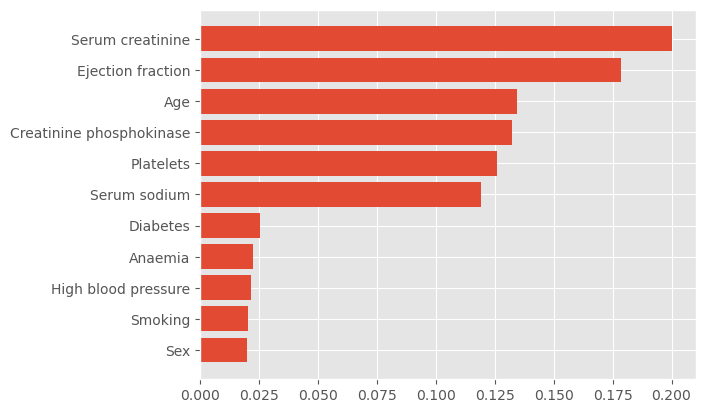

In [10]:
# Random Forest for feature selection - without follow-up time
X_train_RF_sel = np.delete(X_standardized, 11, axis = 1)
y_train_RF_sel = Y
rf = RandomForestClassifier()
rf.fit(X_train_RF_sel, y_train_RF_sel)

bars_without_time = bars
bars_without_time.remove('Follow-up period')
f_i = list(zip(bars_without_time, rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i], [x[1] for x in f_i])

plt.show()

<h3>Top 2 features</h3>

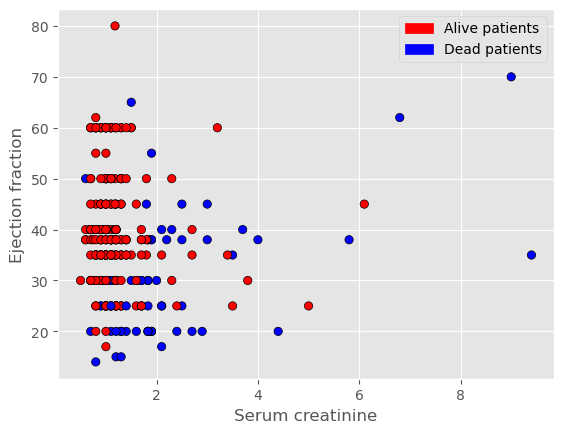

In [11]:
# graph with serum creatinine and ejection fraction parameters
x_axis = column(X, 7)
y_axis = column(X, 4)

colors = []

for i in range(0, len(X)):
    if(Y[i] == 1):
        colors.append('blue')
        continue;
    if(Y[i] == 0):
        colors.append('red')
        continue;

colors = colors[::-1]
plt.scatter(x_axis, y_axis, c = Y, cmap = matplotlib.colors.ListedColormap(colors), edgecolors = 'black')
plt.xlabel("Serum creatinine")
plt.ylabel("Ejection fraction")
red_patch = mpatches.Patch(color = "red", label = "Alive patients")
blue_patch = mpatches.Patch(color = "blue", label = "Dead patients")
plt.legend(handles = [red_patch, blue_patch])

plt.show()

<h3>ML models - Random Forest, Gradient Boosting and SVM (Support Vector Machine) with Gaussian kernel</h3>

In [12]:
# ML models for all features - Random Forest, Gradient Boosting and SVM (Support Vector Machine) with Gaussian kernel
num_of_execution = 100

# Random Forest for all features

sum_acc_RF = 0
f1_score_RF = 0
score_RF_all_feat = 0
score_f1_RF_all_feat = 0

for i in range(0, num_of_execution):
    X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_standardized, Y, test_size = 0.2) # 80% training and 20% test
    
    clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3, min_samples_split=3,
                                 min_samples_leaf=3, min_weight_fraction_leaf=0, max_features='sqrt',
                                 max_leaf_nodes=None, min_impurity_decrease=0, bootstrap=True, oob_score=False,
                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None,
                                 ccp_alpha=0, max_samples=None)
    clf.fit(X_train_RF, y_train_RF)
    
    prediction = clf.predict(X_test_RF)
    
    sum_acc_RF = sum_acc_RF + accuracy_score(y_test_RF, prediction)
    f1_score_RF = f1_score_RF + f1_score(y_test_RF, prediction)

score_RF_all_feat = sum_acc_RF / num_of_execution * 100
score_f1_RF_all_feat = f1_score_RF / num_of_execution

print("Mean accuracy score over 100 executions for random forest method for all features:", score_RF_all_feat, "%")
print("Mean F1 score over 100 executions for random forest method for all features:", score_f1_RF_all_feat)
print("----------------------------------------")

# Gradient Boosting for all features

sum_acc_GB = 0
f1_score_GB = 0
score_GB_all_feat = 0
score_f1_GB_all_feat = 0

for i in range(0, num_of_execution):
    X_train_GB, X_test_GB, y_train_GB, y_test_GB = train_test_split(X_standardized, Y, test_size = 0.2) # 80% training and 20% test
    
    clf = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=10, subsample=1,
                                     criterion='friedman_mse', min_samples_split=3, min_samples_leaf=3,
                                     min_weight_fraction_leaf=0, max_depth=3, min_impurity_decrease=0,
                                     init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None,
                                     warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0)
    clf.fit(X_train_GB, y_train_GB)
    prediction = clf.predict(X_test_GB)
    
    sum_acc_GB = sum_acc_GB + clf.score(X_test_GB, y_test_GB)
    f1_score_GB = f1_score_GB + f1_score(y_test_GB, prediction)

score_GB_all_feat = sum_acc_GB / num_of_execution * 100
score_f1_GB_all_feat = f1_score_GB / num_of_execution

print("Mean accuracy score over 100 executions for gradient boosting method for all features:", score_GB_all_feat, "%")
print("Mean F1 score over 100 executions for gradient boosting method for all features:", score_f1_GB_all_feat)
print("----------------------------------------")

# SVM (Support Vector Machine) with Gaussian kernel for all features

sum_acc_SVM = 0
f1_score_SVM = 0
score_SVM_all_feat = 0
score_f1_SVM_all_feat = 0

for i in range(0, num_of_execution):
    X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_standardized, Y, test_size = 0.2) # 80% training and 20% test

    clf = svm.SVC()
    clf.fit(X_train_SVM, y_train_SVM)

    param_grid = {'C': [0.1, 1, 10, 100, 1000], 
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']} # Gauss

    grid = GridSearchCV(SVC(), param_grid, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0,
                        pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

    grid.fit(X_train_SVM, y_train_SVM)
    
    prediction = clf.predict(X_test_SVM)
    sum_acc_SVM = sum_acc_SVM + clf.score(X_test_SVM, y_test_SVM)
    f1_score_SVM = f1_score_SVM + f1_score(y_test_SVM, prediction)

score_SVM_all_feat = sum_acc_SVM / num_of_execution * 100
score_f1_SVM_all_feat = f1_score_SVM / num_of_execution

print("Mean accuracy score over 100 executions for Support Vector Machine algorithm with Gaussian kernel for all features:",
      score_SVM_all_feat, "%")
print("Mean F1 score over 100 executions for Support Vector Machine algorithm with Gaussian kernel for all features:",
      score_f1_SVM_all_feat)

Mean accuracy score over 100 executions for random forest method for all features: 81.89999999999999 %
Mean F1 score over 100 executions for random forest method for all features: 0.6710397020935882
----------------------------------------
Mean accuracy score over 100 executions for gradient boosting method for all features: 83.05 %
Mean F1 score over 100 executions for gradient boosting method for all features: 0.7022588073624202
----------------------------------------
Mean accuracy score over 100 executions for Support Vector Machine algorithm with Gaussian kernel for all features: 79.35000000000001 %
Mean F1 score over 100 executions for Support Vector Machine algorithm with Gaussian kernel for all features: 0.6483855644874887


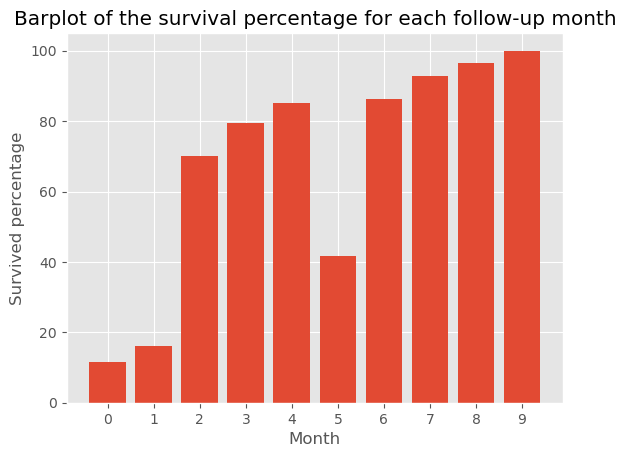

In [13]:
# barplot of survival percentage for each follow-up month (Month 0 -> 0-30 days etc.)
follow_up_period = column(X, 11)

for i in range(0, len(follow_up_period)):
    follow_up_period[i] = int(follow_up_period[i] / 30)
    
months = np.arange(0, 10)
num_of_dead = [0] * 10
num_of_survived = [0] * 10
dead_percent = [0] * 10

for i in range(0, len(follow_up_period)):
    if(Y[i] == 1):
        num_of_dead[int(follow_up_period[i])] = num_of_dead[int(follow_up_period[i])] + 1
    else:
        num_of_survived[int(follow_up_period[i])] = num_of_survived[int(follow_up_period[i])] + 1

for j in range(0, len(months)):
    dead_percent[j] = 100 - num_of_dead[j] / (num_of_dead[j] + num_of_survived[j]) * 100

plt.bar(months, dead_percent)
plt.title("Barplot of the survival percentage for each follow-up month")
plt.xlabel("Month")
plt.ylabel("Survived percentage")
plt.xticks(months)

plt.show()

In [14]:
# ML models for top two features (serum creatinine and ejection fraction) + follow-up period - Random Forest, Gradient Boosting and SVM (Support Vector Machine) with Gaussian kernel

feat_1_2 = np.delete(X_standardized, np.arange(8, 11), axis = 1)
feat_1_2 = np.delete(feat_1_2, np.arange(0, 4), axis = 1)
feat_1_2 = np.delete(feat_1_2, np.arange(1, 3), axis = 1)

# Random Forest for 3 features

sum_acc_RF_12 = 0
f1_score_RF_12 = 0
score_RF_all_feat_12 = 0
score_f1_RF_all_feat_12 = 0

for i in range(0, num_of_execution):
    X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(feat_1_2, Y, test_size = 0.2) # 80% training and 20% test
    
    clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3, min_samples_split=3,
                                 min_samples_leaf=3, min_weight_fraction_leaf=0, max_features='sqrt',
                                 max_leaf_nodes=None, min_impurity_decrease=0, bootstrap=True, oob_score=False,
                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None,
                                 ccp_alpha=0, max_samples=None)
    clf.fit(X_train_RF, y_train_RF)
    
    prediction = clf.predict(X_test_RF)
    
    sum_acc_RF_12 = sum_acc_RF_12 + accuracy_score(y_test_RF, prediction)
    f1_score_RF_12 = f1_score_RF_12 + f1_score(y_test_RF, prediction)

score_RF_all_feat_12 = sum_acc_RF_12 / num_of_execution * 100
score_f1_RF_all_feat_12 = f1_score_RF_12 / num_of_execution

print("Mean accuracy score over 100 executions for random forests method for top two features plus follow-up period:", score_RF_all_feat_12, "%")
print("Mean F1 score over 100 executions for random forests method for top two features plus follow-up period:", score_f1_RF_all_feat_12)
print("----------------------------------------")

# Gradient Boosting for 3 features

sum_acc_GB_12 = 0
f1_score_GB_12 = 0
score_GB_all_feat_12 = 0
score_f1_GB_all_feat_12 = 0

for i in range(0, num_of_execution):
    X_train_GB, X_test_GB, y_train_GB, y_test_GB = train_test_split(feat_1_2, Y, test_size = 0.2) # 80% training and 20% test
    
    clf = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=10, subsample=1,
                                     criterion='friedman_mse', min_samples_split=3, min_samples_leaf=3,
                                     min_weight_fraction_leaf=0, max_depth=3, min_impurity_decrease=0,
                                     init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None,
                                     warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0)
    clf.fit(X_train_GB, y_train_GB)
    prediction = clf.predict(X_test_GB)
    
    sum_acc_GB_12 = sum_acc_GB_12 + clf.score(X_test_GB, y_test_GB)
    f1_score_GB_12 = f1_score_GB_12 + f1_score(y_test_GB, prediction)

score_GB_all_feat_12 = sum_acc_GB_12 / num_of_execution * 100
score_f1_GB_all_feat_12 = f1_score_GB_12 / num_of_execution

print("Mean accuracy score over 100 executions for gradient boosting method for top two features plus follow-up period:", score_GB_all_feat_12, "%")
print("Mean F1 score over 100 executions for gradient boosting method for top two features plus follow-up period:", score_f1_GB_all_feat_12)
print("----------------------------------------")

# SVM (Support Vector Machine) with Gaussian kernel for 3 features

sum_acc_SVM_12 = 0
f1_score_SVM_12 = 0
score_SVM_all_feat_12 = 0
score_f1_SVM_all_feat_12 = 0

for i in range(0, num_of_execution):
    X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(feat_1_2, Y, test_size = 0.2) # 80% training and 20% test

    clf = svm.SVC()
    clf.fit(X_train_SVM, y_train_SVM)

    param_grid = {'C': [0.1, 1, 10, 100, 1000], 
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']} # Gauss

    grid = GridSearchCV(SVC(), param_grid, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0,
                        pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

    grid.fit(X_train_SVM, y_train_SVM)
    
    prediction = clf.predict(X_test_SVM)
    sum_acc_SVM_12 = sum_acc_SVM_12 + clf.score(X_test_SVM, y_test_SVM)
    f1_score_SVM_12 = f1_score_SVM_12 + f1_score(y_test_SVM, prediction)

score_SVM_all_feat_12 = sum_acc_SVM_12 / num_of_execution * 100
score_f1_SVM_all_feat_12 = f1_score_SVM_12 / num_of_execution

print("Mean accuracy score over 100 executions for Support Vector Machine algorithm with Gaussian kernel for top two features plus follow-up period:",
      score_SVM_all_feat_12, "%")
print("Mean F1 score over 100 executions for Support Vector Machine algorithm with Gaussian kernel for top two features plus follow-up period:",
      score_f1_SVM_all_feat_12)

Mean accuracy score over 100 executions for random forests method for top two features plus follow-up period: 84.24999999999999 %
Mean F1 score over 100 executions for random forests method for top two features plus follow-up period: 0.7311699906174843
----------------------------------------
Mean accuracy score over 100 executions for gradient boosting method for top two features plus follow-up period: 83.68333333333331 %
Mean F1 score over 100 executions for gradient boosting method for top two features plus follow-up period: 0.7213340321264121
----------------------------------------
Mean accuracy score over 100 executions for Support Vector Machine algorithm with Gaussian kernel for top two features plus follow-up period: 84.21666666666664 %
Mean F1 score over 100 executions for Support Vector Machine algorithm with Gaussian kernel for top two features plus follow-up period: 0.7458882101171131
